# Mortgage Calculations

In [33]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [8]:
# Converting annual rate to periodic rate
#Rperiodic = (1+Rannual)^1/N-1)

#Example 
# Calculate the monthly mortgage payment of a 141,200, 30 year loan at 2.875 % interest
import numpy as np
monthly_rate = ((1+ 0.02875)**(1/12)-1)
np.pmt(rate=monthly_rate,nper=12*30,pv=141200)

-583.0241204313185

# Calculating downpayment based on percent

In [9]:

# Set the value of the home you are looking to buy
home_value = 149500

# What percentage are you paying up-front?
down_payment_percent = 0.053

# Calculate the dollar value of the down payment
down_payment = home_value*down_payment_percent
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value - down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 7923.5
Mortgage Loan: 141576.5


In [10]:
mortgage_rate = 0.02875

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = (1+mortgage_rate)**(1/12) - 1

# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = 30*12

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*np.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 584.58


In [11]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_loan*mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 334.8
Initial Principal Payment: 249.77


In [48]:
principal_remaining = [0] * 360
dataframe = []
# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the principal remaining values in an array
    principal_remaining[i] = round(previous_principal_remaining - principal_payment,2)
    
    # Print the payments for the first few periods
   # print_payments(i, interest_payment, principal_payment, principal_remaining)
    dataframe = [{'interest_payment': interest_payment, 'principal_payment': principal_payment, 'principal_remaining':principal_remaining,'month': i}]

df=pd.DataFrame(dataframe)
df
dataframe


[{'interest_payment': 1.38,
  'principal_payment': 582.37,
  'principal_remaining': [141326.72,
   141076.35,
   140825.39,
   140573.84,
   140321.69,
   140068.95,
   139815.61,
   139561.67,
   139307.13,
   139051.99,
   138796.24,
   138539.89,
   138282.93,
   138025.37,
   137767.2,
   137508.42,
   137249.02,
   136989.01,
   136728.39,
   136467.15,
   136205.29,
   135942.81,
   135679.71,
   135415.99,
   135151.65,
   134886.68,
   134621.08,
   134354.86,
   134088.01,
   133820.53,
   133552.41,
   133283.66,
   133014.27,
   132744.25,
   132473.59,
   132202.29,
   131930.35,
   131657.76,
   131384.53,
   131110.65,
   130836.12,
   130560.95,
   130285.12,
   130008.64,
   129731.51,
   129453.72,
   129175.28,
   128896.18,
   128616.42,
   128336.0,
   128054.91,
   127773.16,
   127490.74,
   127207.65,
   126923.89,
   126639.46,
   126354.36,
   126068.59,
   125782.14,
   125495.01,
   125207.2,
   124918.71,
   124629.54,
   124339.69,
   124049.15,
   123757.9

In [81]:
principal_remaining = [0] * 360
principal_payment_list = []
interest_payment_list = []
principal_remaining_list = []
month_period_list = []
# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the principal remaining values in an array
    principal_remaining[i] = round(previous_principal_remaining - principal_payment,2)
    
    principal_payment_list.append(principal_payment)
    interest_payment_list.append(interest_payment)
    principal_remaining_list.append(principal_remaining)
    month_period_list.append(i)
    
   # amortization_table = pd.DataFrame(np.column_stack([month_period_list, principal_payment_list, interest_payment_list,principal_remaining_list]), 
   #                            columns=['Month_Period', 'Principal_Payment', 'Interest_Payment','Principal_Remaining'])
    amortization_table = pd.DataFrame(list(map(list, zip(month_period_list,principal_payment_list,interest_payment_list,principal_remaining_list[i]))))
    amortization_table.columns = ['month_period', 'principal_payment', 'interest_payment','principal_remaining']

In [82]:
# Ammortization table
amortization_table

,month_period,principal_payment,interest_payment,principal_remaining
0,0,249.78,334.80,141326.72
1,1,250.37,334.21,141076.35
2,2,250.96,333.62,140825.39
3,3,251.55,333.03,140573.84
4,4,252.15,332.43,140321.69
...,...,...,...,...
355,355,577.72,6.86,2323.73
356,356,579.08,5.50,1744.65
357,357,580.45,4.13,1164.20
358,358,581.83,2.75,582.37


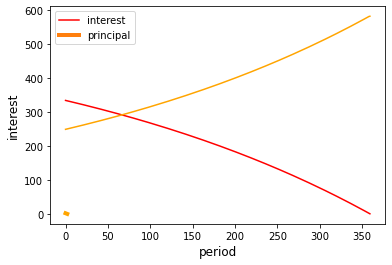

In [122]:
import matplotlib.pyplot as plt
interest_paid=[0] * 360
principal_paid=[0] * 360
principal_remaining=[0] * 360

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
# Plot the interest vs principal
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="orange")
interest, = plt.plot([1, 2, 3], label="interest",color = "red")
principal, = plt.plot([3, 2, 1], label="principal", linewidth=4,color="orange")
plt.legend(handles=[interest, principle], loc=2)
plt.xlabel('period', fontsize=12)
plt.ylabel('interest', fontsize=12)
plt.show()

# Percent ownership of mortgage

In [117]:
# cumsum vs cumprod
import numpy as np
np.cumsum(np.array([1,2,3])) # 1, then 1+2, then 1+2+3
np.cumprod(np.array([1,2,3])) # 1, then 1*2,then 1*2*3

array([1, 2, 6], dtype=int32)

# # Forecasting cumulative growth

In [119]:
# Forecasting cumulative growth
# Example:
# What is the cumulative value at each point in time of a 100 dollar 
#investment that grows by 3% in period 1 then 3% again in period 2 
#and then by 5% in period 3

np.cumprod(1 + np.array([0.03,0.03,0.05]))

array([1.03    , 1.0609  , 1.113945])

[0.05467077 0.05634548 0.05802415 0.05970676 0.06139338 0.06308395
 0.06477853 0.06647712 0.06817973 0.06988635 0.07159706 0.07331177
 0.07503057 0.07675338 0.07848027 0.08021124 0.08194635 0.08368555
 0.08542883 0.08717625 0.08892783 0.09068355 0.09244341 0.09420742
 0.09597559 0.09774796 0.09952455 0.10130528 0.10309023 0.1048794
 0.10667284 0.1084705  0.11027244 0.1120786  0.11388903 0.11570375
 0.11752274 0.11934609 0.12117371 0.12300569 0.12484201 0.12668261
 0.12852763 0.13037699 0.1322307  0.13408883 0.1359513  0.13781819
 0.1396895  0.14156522 0.14344542 0.14533003 0.14721913 0.14911271
 0.15101077 0.15291331 0.15482033 0.15673184 0.15864789 0.16056849
 0.16249365 0.16442334 0.16635759 0.16829639 0.1702398  0.17218776
 0.17414033 0.17609753 0.1780594  0.18002589 0.18199699 0.18397278
 0.18595324 0.18793839 0.18992823 0.19192281 0.19392207 0.19592609
 0.19793485 0.19994836 0.20196662 0.20398963 0.20601746 0.20805003
 0.21008742 0.21212963 0.21417666 0.21622856 0.21828528 0.22034

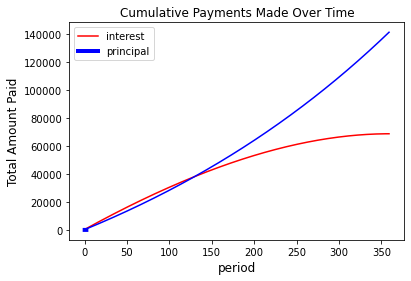

In [125]:
# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum(principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity/home_value)
print(cumulative_percent_owned)

# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_home_equity, color='blue')
interest_plot, = plt.plot([1, 2, 3], label="interest",color = "red")
principal_plot, = plt.plot([3, 2, 1], label="principal", linewidth=4,color="blue")
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.xlabel('period', fontsize=12)
plt.ylabel('Total Amount Paid', fontsize=12)
plt.title('Cumulative Payments Made Over Time', fontsize=12)
plt.show()

# Raising House Prices

In [154]:
cumulative_percent_owned = np.array([0.20121838, 0.2024405 , 0.20366638, 0.20489603, 0.20612945,
       0.20736666, 0.20860768, 0.2098525 , 0.21110115, 0.21235364,
       0.21360998, 0.21487017, 0.21613424, 0.21740219, 0.21867404,
       0.21994979, 0.22122946, 0.22251308, 0.22380063, 0.22509214,
       0.22638761, 0.22768706, 0.22899051, 0.23029796, 0.23160944,
       0.23292494, 0.23424448, 0.23556808, 0.23689574, 0.23822748,
       0.23956331, 0.24090325, 0.2422473 , 0.24359549, 0.24494781,
       0.2463043 , 0.24766495, 0.24902979, 0.25039881, 0.25177205,
       0.2531495 , 0.25453119, 0.25591711, 0.2573073 , 0.25870176,
       0.2601005 , 0.26150354, 0.26291089, 0.26432256, 0.26573857,
       0.26715894, 0.26858366, 0.27001276, 0.27144626, 0.27288416,
       0.27432649, 0.27577324, 0.27722444, 0.27868009, 0.28014021,
       0.28160483, 0.28307394, 0.28454756, 0.28602571, 0.28750841,
       0.28899566, 0.29048749, 0.29198389, 0.29348489, 0.2949905 ,
       0.29650074, 0.29801563, 0.29953516, 0.30105936, 0.30258825,
       0.30412184, 0.30566014, 0.30720316, 0.30875093, 0.31030345,
       0.31186074, 0.31342281, 0.31498969, 0.31656138, 0.3181379 ,
       0.31971926, 0.32130549, 0.32289659, 0.32449258, 0.32609346,
       0.32769928, 0.32931001, 0.3309257 , 0.33254635, 0.33417199,
       0.33580261, 0.33743825, 0.33907891, 0.34072461, 0.34237538,
       0.34403121, 0.34569214, 0.34735816, 0.3490293 , 0.35070558,
       0.352387  , 0.3540736 , 0.35576538, 0.35746235, 0.35916454,
       0.36087196, 0.36258463, 0.36430255, 0.36602575, 0.36775425,
       0.36948806, 0.3712272 , 0.37297169, 0.37472152, 0.37647674,
       0.37823735, 0.38000338, 0.38177483, 0.38355171, 0.38533406,
       0.38712189, 0.38891521, 0.39071404, 0.39251839, 0.39432829,
       0.39614375, 0.39796479, 0.39979143, 0.40162368, 0.40346155,
       0.40530508, 0.40715426, 0.40900914, 0.4108697 , 0.41273599,
       0.41460801, 0.41648579, 0.41836933, 0.42025865, 0.42215379,
       0.42405474, 0.42596154, 0.42787419, 0.42979272, 0.43171715,
       0.43364749, 0.43558376, 0.43752599, 0.43947417, 0.44142835,
       0.44338852, 0.44535472, 0.44732696, 0.44930526, 0.45128964,
       0.45328011, 0.4552767 , 0.45727942, 0.4592883 , 0.46130335,
       0.4633246 , 0.46535205, 0.46738574, 0.46942568, 0.47147187,
       0.47352436, 0.47558316, 0.47764829, 0.47971975, 0.48179758,
       0.48388179, 0.4859724 , 0.48806944, 0.49017293, 0.49228288,
       0.4943993 , 0.49652224, 0.49865169, 0.50078769, 0.50293025,
       0.5050794 , 0.50723515, 0.50939753, 0.51156654, 0.51374221,
       0.51592458, 0.51811365, 0.52030945, 0.52251199, 0.5247213 ,
       0.5269374 , 0.52916031, 0.53139005, 0.53362664, 0.5358701 ,
       0.53812045, 0.54037771, 0.54264191, 0.54491308, 0.54719121,
       0.54947635, 0.55176851, 0.55406771, 0.55637398, 0.55868733,
       0.56100779, 0.56333538, 0.56567011, 0.56801203, 0.57036114,
       0.57271746, 0.57508104, 0.57745187, 0.57982999, 0.58221541,
       0.58460816, 0.58700826, 0.58941574, 0.59183061, 0.59425291,
       0.59668265, 0.59911985, 0.60156454, 0.60401674, 0.60647648,
       0.60894378, 0.61141865, 0.61390113, 0.61639124, 0.618889  ,
       0.62139444, 0.62390756, 0.62642841, 0.62895701, 0.63149338,
       0.63403754, 0.63658951, 0.63914933, 0.64171701, 0.64429259,
       0.64687608, 0.6494675 , 0.65206689, 0.65467426, 0.65728965,
       0.65991308, 0.66254455, 0.66518411, 0.66783179, 0.6704876 ,
       0.67315158, 0.67582374, 0.6785041 , 0.6811927 , 0.68388956,
       0.68659471, 0.68930818, 0.69202998, 0.69476014, 0.69749869,
       0.70024565, 0.70300105, 0.70576493, 0.70853729, 0.71131816,
       0.71410759, 0.71690559, 0.71971218, 0.72252739, 0.72535125,
       0.72818379, 0.73102504, 0.73387501, 0.73673375, 0.73960126,
       0.74247759, 0.74536275, 0.74825678, 0.7511597 , 0.75407154,
       0.75699233, 0.75992209, 0.76286085, 0.76580864, 0.76876549,
       0.77173143, 0.77470648, 0.77769066, 0.78068403, 0.78368658,
       0.78669835, 0.78971939, 0.7927497 , 0.79578933, 0.79883829,
       0.80189663, 0.80496436, 0.80804153, 0.81112814, 0.81422424,
       0.81732985, 0.820445  , 0.82356973, 0.82670405, 0.829848  ,
       0.83300161, 0.83616491, 0.83933794, 0.84252071, 0.84571326,
       0.84891563, 0.85212783, 0.8553499 , 0.85858188, 0.86182378,
       0.86507564, 0.86833749, 0.87160936, 0.87489129, 0.8781833 ,
       0.88148543, 0.8847977 , 0.88812015, 0.89145281, 0.89479571,
       0.89814887, 0.90151235, 0.90488615, 0.90827032, 0.9116649 ,
       0.9150699 , 0.91848536, 0.92191131, 0.9253478 , 0.92879484,
       0.93225248, 0.93572072, 0.93919964, 0.94268924, 0.94618956,
       0.94970064, 0.9532225 , 0.95675519, 0.96029872, 0.96385315,
       0.9674185 , 0.9709948 , 0.97458209, 0.9781804 , 0.98178978,
       0.98541024, 0.98904183, 0.99268456, 0.9963385 ,.1])


growth_array = np.array([0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025])

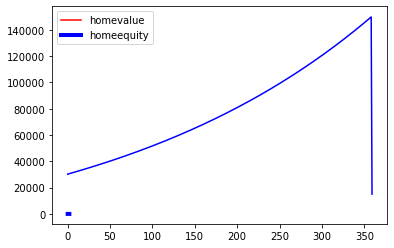

In [156]:
growth_array = 0.0025
home_value = 150000
# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1+ growth_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = cumulative_percent_owned*home_value_forecast

# Plot the home value vs equity accumulated
plt.plot(home_value_forecast, color='red')
plt.plot(cumulative_home_value_owned, color='blue')
homevalue_plot, = plt.plot([1, 2, 3], label="homevalue",color = "red")
homeequity_plot, = plt.plot([1, 2, 3], label="homeequity", linewidth=4,color="blue")
plt.legend(handles=[homevalue_plot, homeequity_plot], loc=2)
plt.show()

In [157]:
decline_array = np.array([-0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045, -0.0045,
       -0.0045, -0.0045, -0.0045])

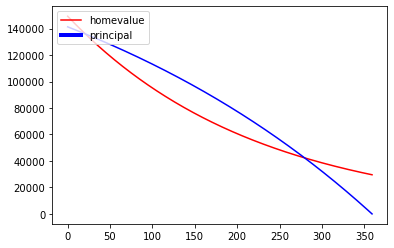

In [158]:
# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = home_value*cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = principal_remaining > home_value_forecast
pd.value_counts(underwater)

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
plt.legend(handles=[homevalue_plot, principal_plot], loc=2)
plt.show()